In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv(r"C:\Lab\NNDL\iris\Iris.csv")

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

X = df.drop('Species', axis=1).values
y = df['Species'].values

In [3]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [4]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))


c:\Users\aparn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.1, verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5126 - loss: 1.0318 - val_accuracy: 0.5833 - val_loss: 1.0491
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6516 - loss: 0.8601 - val_accuracy: 0.6667 - val_loss: 0.9962
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.8244 - val_accuracy: 0.7500 - val_loss: 0.9464
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7788 - loss: 0.7471 - val_accuracy: 0.7500 - val_loss: 0.9051
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6933 - loss: 0.7450 - val_accuracy: 0.7500 - val_loss: 0.8711
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7842 - loss: 0.6406 - val_accuracy: 0.7500 - val_loss: 0.8344
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7699 - loss: 0.6041 - val_accuracy: 0.7500 - val_loss: 0.8078
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7688 - loss: 0.6246 - val_accuracy: 0.7500 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


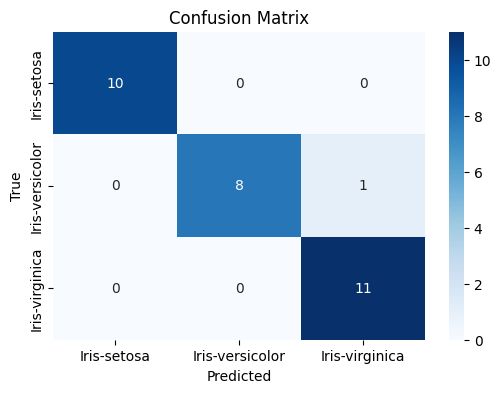

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))


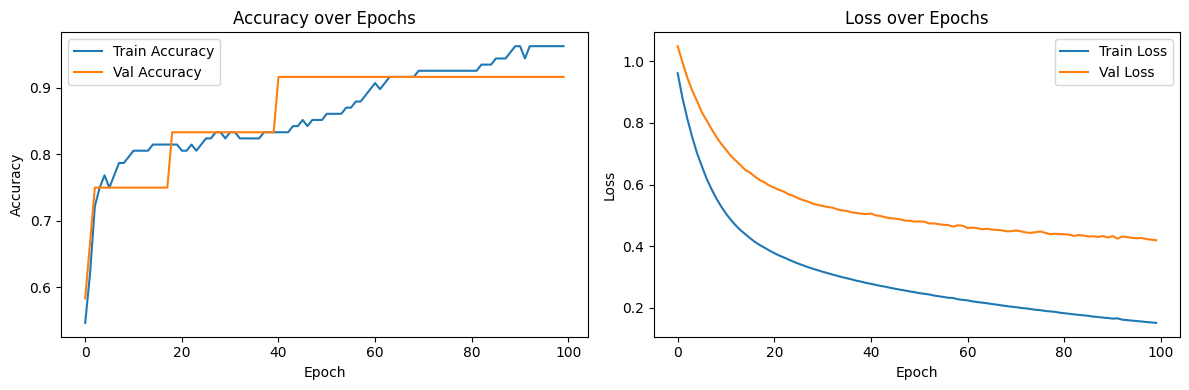

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {test_accuracy * 100:.2f}%")


Accuracy: 96.67%
